In [6]:
from matplotlib import pyplot as plt
import numpy as np
from figure_v3 import plot_sig
from eeg_v2 import EEG
from utils import chunks, baseline_calc, butter_bandpass_filter
import joblib
from mne.preprocessing import ICA
from psd import plot_psd_v2
import numpy as np

plt.rcParams["figure.figsize"] = [20, 5]

In [4]:
# Reading raw data
path_edf="./edf/1578_alice/edf/A0001578.edf"
path_stage="./edf/1578_alice/csv/STAGE.csv"

eeg = EEG(path_edf=path_edf, path_stage=path_stage)

E:\OneDrive\Desktop\codes\ica_paper\eeg_v2.py:17: RuntimeWarning: Channel names are not unique, found duplicates for: {'EMG Chin'}. Applying running numbers for duplicates.
  raw = read_raw_edf(self.path_edf, preload=True, verbose=0)


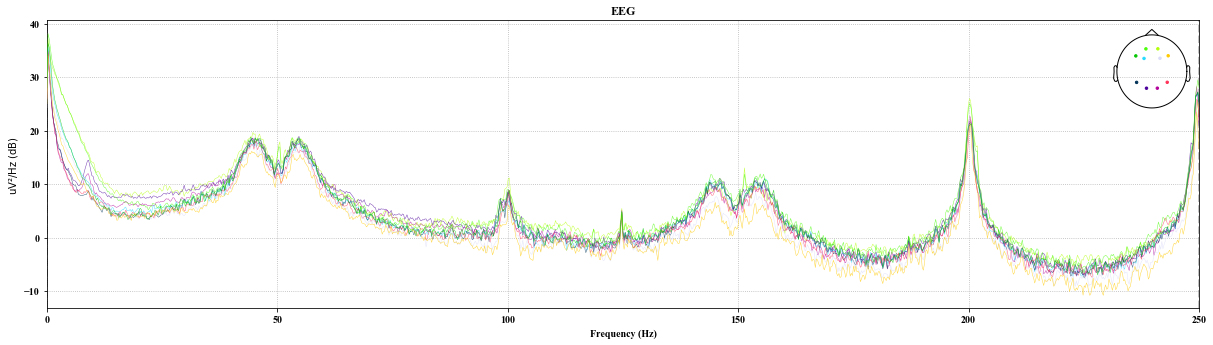

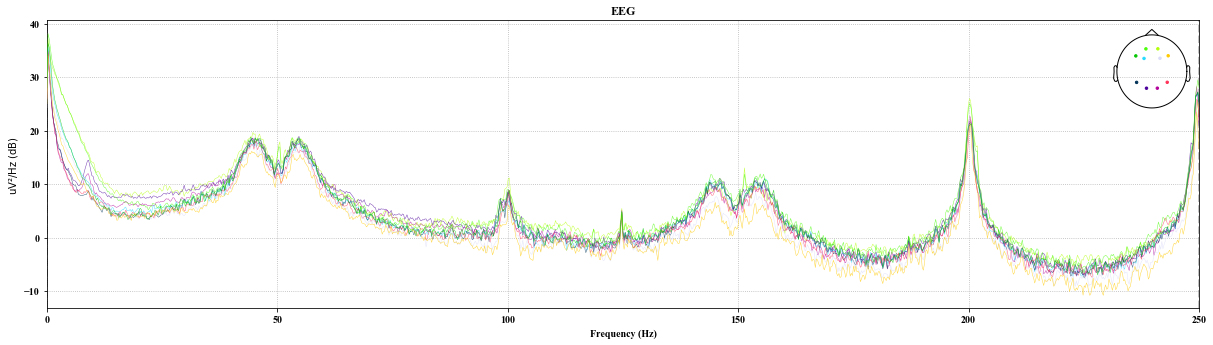

In [5]:
eeg.raw.plot_psd()

In [8]:
def get_chunks(sig):
    i = 0
    for task in sig.tasks:
        for c in chunks(task, 15):
            i+=1
            yield i, c
            
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n + 1]
        
# Preprocessing pipeline
def baseline_bandpass(chunk):
    sample_raw = eeg.raw.copy().crop(np.min(chunk),np.max(chunk),include_tmax=False)
    sample_raw_eog = eeg.eog_channels.copy().crop(np.min(chunk),np.max(chunk),include_tmax=False)


    # Baseline
    sample_raw_baseline = sample_raw.copy()
    sample_raw_baseline = sample_raw_baseline.apply_function(baseline_calc)

    # Bandpass
    sample_raw_bandpass = sample_raw_baseline.copy()
    sample_raw_bandpass = sample_raw_bandpass.apply_function(butter_bandpass_filter)
    
    return sample_raw, sample_raw_baseline, sample_raw_bandpass, sample_raw_eog

In [9]:
i = 0
for task in eeg.tasks:
    for c in chunks(task, 15):
        i+=1

        if i!=7:
            continue

        if i>7:
            break

        sample_raw, sample_raw_baseline, sample_raw_bandpass, sample_raw_eog = baseline_bandpass(c)

In [10]:
X = sample_raw.get_data()

In [11]:
X.shape

(10, 7500)

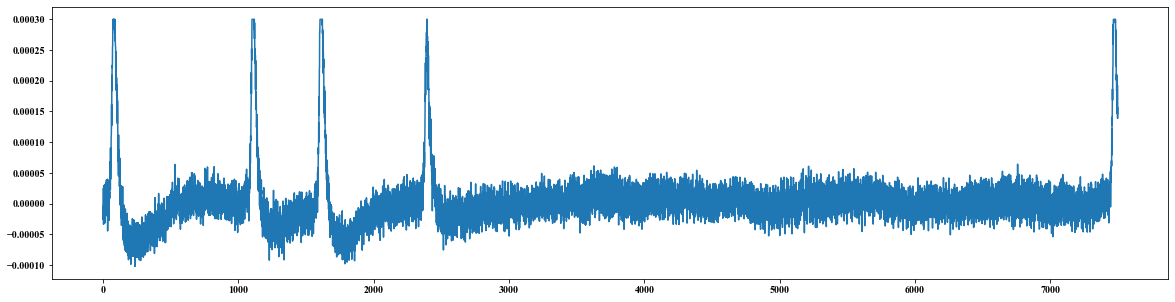

In [13]:
plt.plot(X[0,:]);

In [21]:
(np.max(X) - np.min(X))*1e6

413.04029304029297